
# Exploratory Data Analysis (EDA) - on Netflix Movies Dataset

## Objective
Perform a comprehensive Exploratory Data Analysis (EDA) on a Netflix movies dataset to uncover insights about movie trends, performance, and characteristics. 

We will go through the following steps:
1. Understand the Dataset  
2. Data Loading and Inspection  
3. Data Cleaning  
4. Descriptive Statistics  
5. Univariate Analysis  
6. Bivariate & Multivariate Analysis  
7. Feature Engineering  
8. Visualization  
9. Hypothesis Testing  
10. Documentation of Insights


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For better visuals
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Load the dataset
df = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [3]:

# Dataset Shape and Info
print("Shape:", df.shape)
df.info()


Shape: (16000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: floa

In [5]:

# Checking missing values
df.isnull().sum().sort_values(ascending=False)


duration        16000
country           466
cast              204
director          132
description       132
genres            107
language            0
budget              0
vote_average        0
vote_count          0
popularity          0
show_id             0
type                0
rating              0
release_year        0
date_added          0
title               0
revenue             0
dtype: int64

## 1.Data Cleaning

In [7]:

# Drop column with all missing values
df.drop(columns=['duration'], inplace=True)

# Handle missing categorical columns
for col in ['director', 'cast', 'country', 'genres', 'description']:
    df[col] = df[col].fillna("Unknown")

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check and remove duplicates
df.drop_duplicates(inplace=True)

# Final null check
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
genres          0
language        0
description     0
popularity      0
vote_count      0
vote_average    0
budget          0
revenue         0
dtype: int64

## 2.Descriptive Statistics

In [9]:

df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,16000.0,NaN,NaN,NaN,526658.174813,189.0,225725.75,446817.0,773980.75,1440471.0,379442.71883
type,16000,1,Movie,16000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,16000,15485,Eden,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,16000,9509,Unknown,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,16000,15640,Unknown,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,16000,1464,United States of America,5421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,16000,NaN,NaN,NaN,2018-01-04 21:54:37.799999744,2010-01-01 00:00:00,2013-12-31 18:00:00,2017-12-31 12:00:00,2021-12-31 06:00:00,2025-12-25 00:00:00,NaN
release_year,16000.0,NaN,NaN,NaN,2017.5,2010.0,2013.75,2017.5,2021.25,2025.0,4.609916
rating,16000.0,NaN,NaN,NaN,5.956368,0.0,5.6,6.3,6.923,10.0,1.754741
genres,16000,2769,Drama,1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.Univariate Analysis

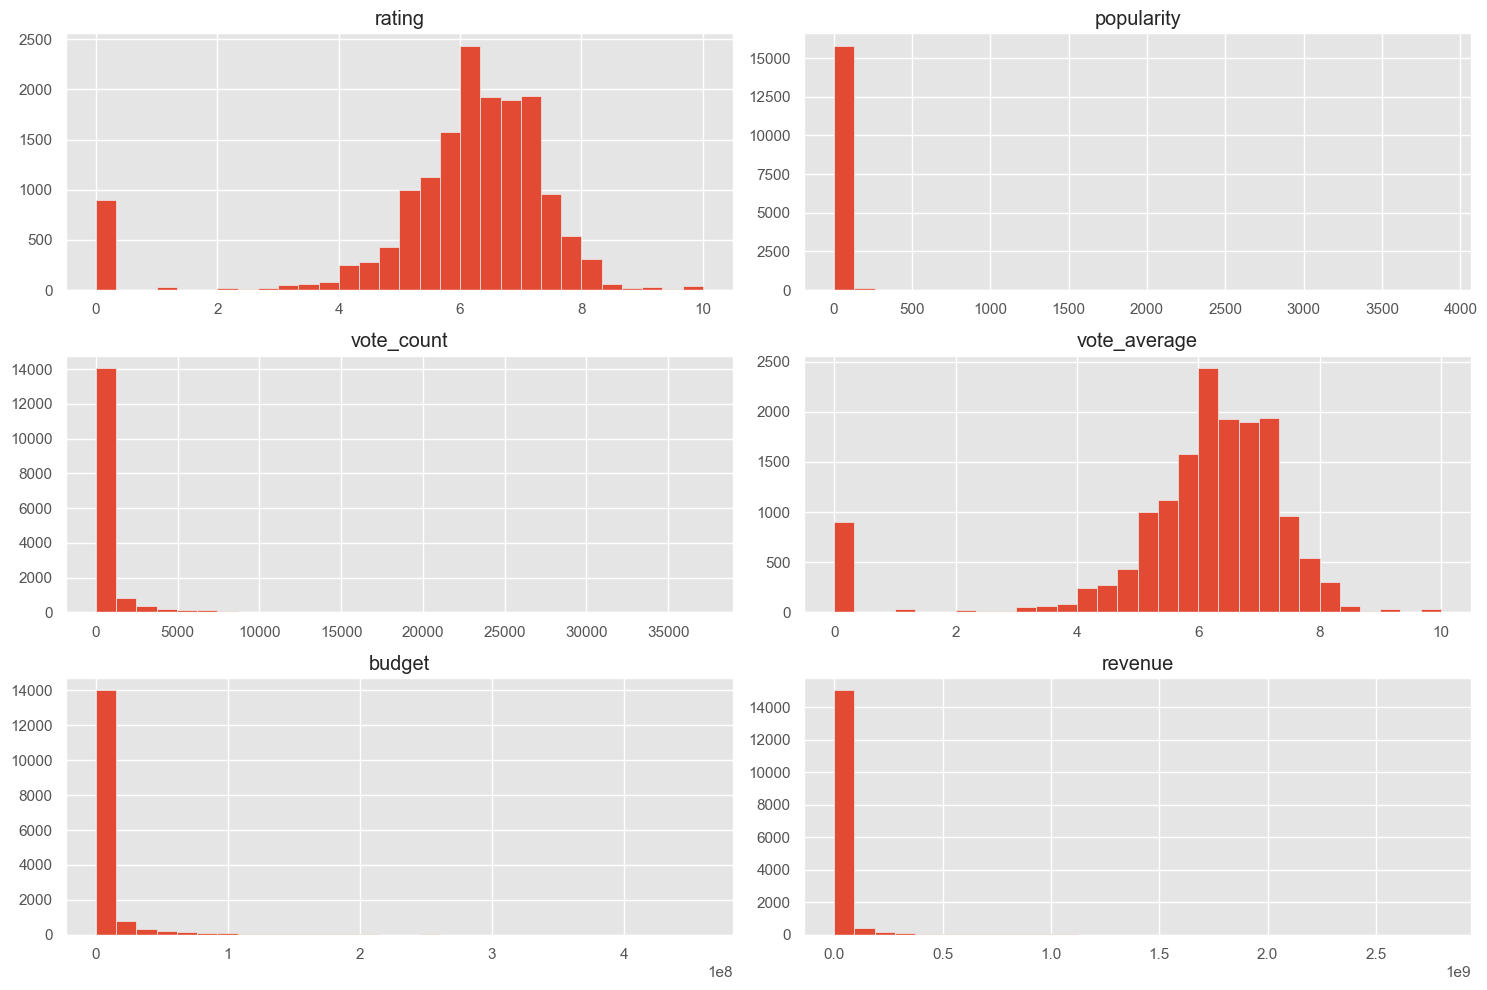

In [11]:

# Numeric Distributions
numeric_cols = ['rating', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue']
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


## 4.Bivariate and Multivariate Analysis

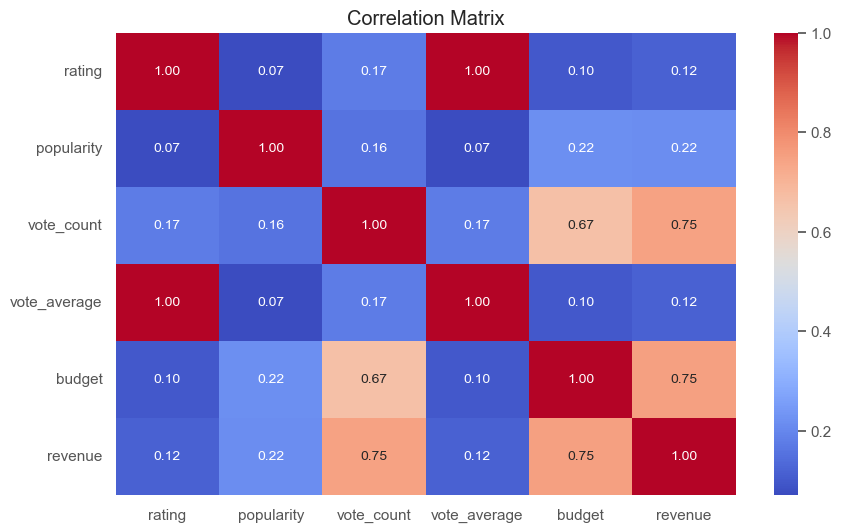

In [13]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


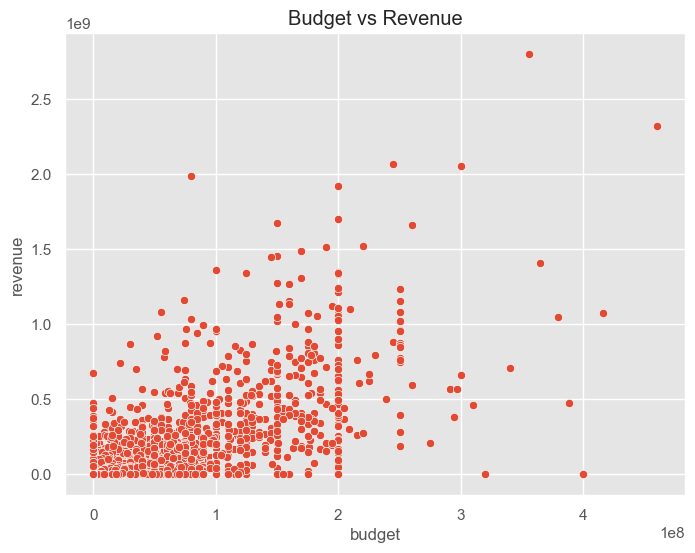

In [15]:

# Revenue vs Budget
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Budget vs Revenue")
plt.show()


## 5.Feature Engineering

In [23]:

# Calculate ROI
df['roi'] = (df['revenue'] - df['budget']) / df['budget']
df['release_decade'] = (df['release_year'] // 10) * 10


## 6.Visualizations

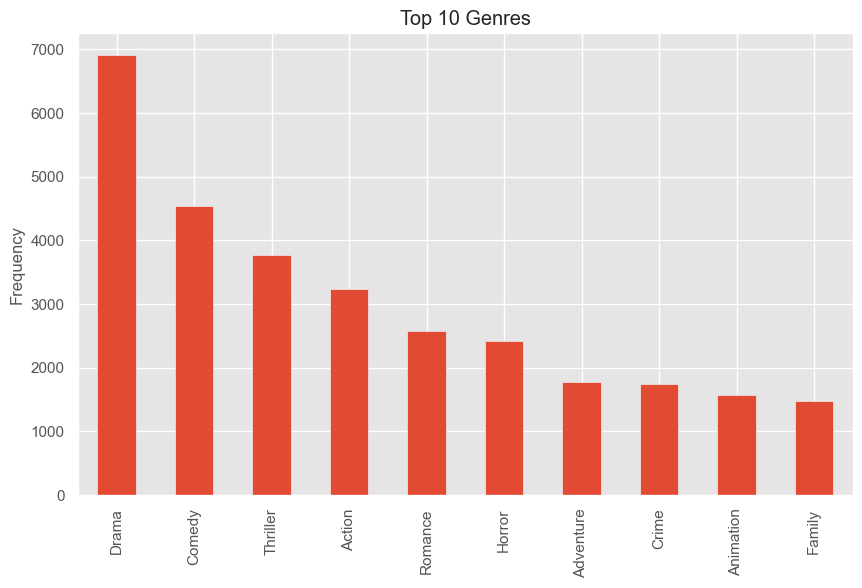

In [25]:

# Top genres
from collections import Counter

genres_expanded = df['genres'].str.split(', ')
genres_list = [genre for sublist in genres_expanded for genre in sublist]
top_genres = pd.Series(Counter(genres_list)).nlargest(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.title("Top 10 Genres")
plt.ylabel("Frequency")
plt.show()


## 7.Hypothesis Testing

In [21]:

from scipy.stats import ttest_ind

# Test if popular movies have significantly higher vote_average
popular_movies = df[df['popularity'] > df['popularity'].median()]
unpopular_movies = df[df['popularity'] <= df['popularity'].median()]

t_stat, p_value = ttest_ind(popular_movies['vote_average'], unpopular_movies['vote_average'], equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 21.84502920854474
P-value: 3.557802972866313e-104


## Insights and Next Steps


- Most common genres include **Drama**, **Comedy**, and **Action**.
- Budget and revenue show a strong positive correlation.
- Popular movies tend to have slightly higher average ratings.
- ROI helps highlight high-performing low-budget films.
- There are many missing values originally in cast/director, filled with "Unknown".
- No 'duration' column available for analysis.

📍 **Next Steps:**
- Use more external datasets (e.g., IMDb ratings, user reviews).
- Build recommendation system.
- Time-series trends with 'date_added'.
